<a href="https://colab.research.google.com/github/Klaudia2022/Obliczenianaukowe/blob/main/uczenie_maszynowe_live.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresja liniowa

In [48]:
from sklearn import datasets #zbiory danych
from sklearn import model_selection #podział danych na uczące i testowe
from sklearn import linear_model
from sklearn import metrics #miary do oceny pracy modelu
from sklearn import cluster

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [9]:
X_all, y_all=datasets.make_regression(n_samples=50, n_features=50, n_informative=10)

In [10]:
X_all.shape

(50, 50)

In [11]:
y_all.shape

(50,)

In [12]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X_all,y_all,test_size=25)

In [13]:
X_train.shape

(25, 50)

In [14]:
model=linear_model.LinearRegression()

In [15]:
model.fit(X_train,y_train)

LinearRegression()

In [16]:
y_predict=model.predict(X_test)

In [17]:
(y_test-y_predict).std()

151.90272301794926

In [18]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))

159.64519348367864

In [19]:
np.sqrt(metrics.mean_squared_error(y_train,model.predict(X_train)))

3.463660803182554e-13

In [20]:
def rysuj_reszty_i_współczynniki(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("Numer próbki")
    axes[0].set_ylabel("Reszta")
    axes[0].set_title("Zbiór uczący")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("Numer próbki")
    axes[1].set_ylabel("Reszta")
    axes[1].set_title("Zbiór testowy")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("Numer współczynnika")
    axes[2].set_ylabel("Wartość współczynnika")
    fig.tight_layout()
    return fig, axes

(<Figure size 864x216 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c6c6f92d0>,
       dtype=object))

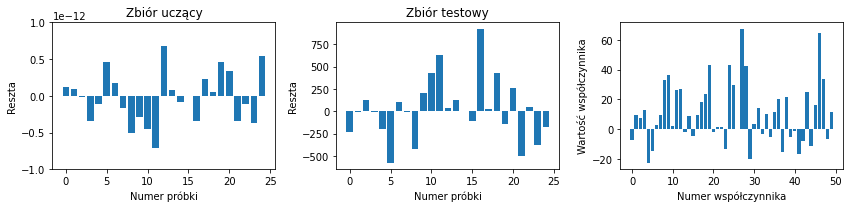

In [21]:
rysuj_reszty_i_współczynniki(y_train-model.predict(X_train),y_test-model.predict(X_train),model.coef_)

## Sposoby poprawienia modelu regresji
Model domyślnie dopasowuje się metodą najmniejszych kwadratów, czyli minimalizuje funkcję sse. Możemy zmienić tę 'taktykę' dodając 'karę' za jakość dobranych współczynników:
* metoda LASSO, ```linear_model.Lasso``` (preferuje jak najmniej niezerowych współczynników)
* regresja grzebietowa, ```linear_model.Ridge``` (preferuje jak najmniejsze współczynniki)

## Zadanie
* dokonaj podziału danych na uczące i testowe
* przeprowadź analizę regresji metodą Lasso lub regresją grzbietową z ustalonym współczynnikiem $\alpha$ 
* sprawdź błąd kwadratowy na danych uczących i na danych testowych
* oceń dopasowanie modelu metodą score
* sporządź rysunki za pomocą zdefiniowanej wyżej funkcji ```rysuj_reszty_i_współczynniki```

In [22]:
model2=linear_model.Ridge()
model2.fit(X_train,y_train)
y_predict=model2.predict(X_test)

In [23]:
np.sqrt(metrics.mean_squared_error(y_predict,y_test))

161.6733713670508

In [24]:
model2.score(X_train,y_train)

0.9994075687828686

In [25]:
model2.score(X_test,y_test)

0.5873638655295319

(<Figure size 864x216 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c647b9710>,
       dtype=object))

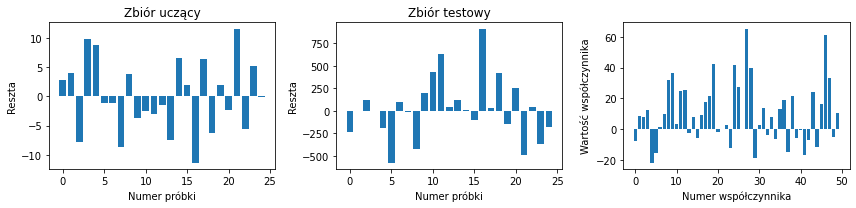

In [26]:
rysuj_reszty_i_współczynniki(y_train-model2.predict(X_train),y_test-model2.predict(X_train),model2.coef_)

# Klasyfikacja
Dokonamy klasyfikacji (przypisania do grup) danych na podstawie zbioru danych cech irysów. Korzystamy z modelu ```linear_model.LogisticRegression```. Można też wykorzystać w tym celu:
* drzewa decyzyjne ```tree.DecisionTreeClassifier```
* metodę najbliższego sąsiada ```neighbors.KNeighborsClassifier```

In [27]:
irysy=datasets.load_iris()

In [28]:
type(irysy)

sklearn.utils.Bunch

In [29]:

X_all=irysy.data
y_all=irysy.target

In [30]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X_all,y_all)

In [31]:
model=linear_model.LogisticRegression()

In [32]:
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [33]:
y_predict=model.predict(X_test)

In [34]:
y_predict-y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



## Zadanie 
Spośród cech irysów wybierz tylko dwie i dokonaj klasyfikacji gatunków za ich pomocą metodą najbliższych trzech sąsiadów (dla wcześniej zdefiniowanego podziału). Narysuj wykres punktowy opisujący te dwie wybrane cechy i z kolorami punktów zależnymi od klasyfikacji (na danych testowych). Obok narysuj ten sam wykres z oryginalną klasyfikacją.

neighbors.KNeighborsClassifier

In [36]:
irysy.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [37]:
from sklearn import neighbors
model=neighbors.KNeighborsClassifier(3)
x=0
y=2
model.fit(X_train[:,[x,y]],y_train)

KNeighborsClassifier(n_neighbors=3)

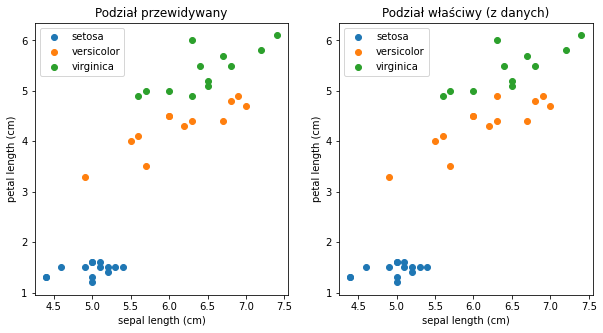

In [38]:
y_predict=model.predict(X_test[:,[x,y]])

fig,ax=plt.subplots(1,2,figsize=(10,5))
for i in range(3):
    maska=(y_predict == i)
    ax[0].scatter(X_test[:,x][maska],X_test[:,y][maska],label=irysy.target_names[i])
    ax[0].set(title='Podział przewidywany', xlabel=irysy.feature_names[x],ylabel=irysy.feature_names[y])
ax[0].legend()

for i in range(3):
    maska=(y_test == i)
    ax[1].scatter(X_test[:,x][maska],X_test[:,y][maska],label=irysy.target_names[i])
    ax[1].set(title='Podział właściwy (z danych)', xlabel=irysy.feature_names[x],ylabel=irysy.feature_names[y])
ax[1].legend()

## Zadanie domowe
* wygeneruj dane do regresji liniowej z 100 próbkami, 40 cechami, w tym 20 istotnymi i wybranym random_state
* przeprowadź analizę metodą Lasso dla różnych parametrów $\alpha$ i spróbuj określić jaki współczynnik jest najlepszy dla przewidywania przyszłych wyników

In [39]:
X_all, y_all=datasets.make_regression(n_samples=100, n_features=40, n_informative=20, random_state=123456)

In [40]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X_all,y_all)

In [41]:
X_train.shape

(75, 40)

In [42]:
y_train.shape

(75,)

In [43]:
alfa=[0,0.00025,0.001, 0.005, 0.01, 0.1, 0.5, 0.75, 1,5,10,25,50,100,1000,50000]

In [44]:
for el in alfa:
  model=linear_model.Lasso(el)
  model.fit(X_train, y_train)
  y_predict=model.predict(X_test)
  print("alfa: ", el, " wynik ", np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

alfa:  0  wynik  0.1227769045606816
alfa:  0.00025  wynik  0.11934384667861163
alfa:  0.001  wynik  0.11002130435599057
alfa:  0.005  wynik  0.11233191676329934
alfa:  0.01  wynik  0.13299370574679803
alfa:  0.1  wynik  1.1059981545931297
alfa:  0.5  wynik  5.4654471484633245
alfa:  0.75  wynik  7.889702196925858
alfa:  1  wynik  10.303375623295212
alfa:  5  wynik  47.41759014436408
alfa:  10  wynik  89.19813635041729
alfa:  25  wynik  172.0800681555332
alfa:  50  wynik  235.43373269570668
alfa:  100  wynik  292.6387572796594
alfa:  1000  wynik  298.1304693381941
alfa:  50000  wynik  298.1304693381941


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Najlepsze uczenie programu jest dla alfa z przedziału (0.001, 0.01)

#Klasteryzacja

In [45]:
irysy

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [46]:
X=irysy.data
y=irysy.target

In [49]:
model=cluster.KMeans(3)

In [50]:
model.fit(X)

KMeans(n_clusters=3)

In [57]:
y_predict=model.predict(X)

In [53]:
y_predict-y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,
       -1,  0, -1,  0, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0, -1,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0, -1])

In [54]:
for el in y_predict:
  if el==1:
    el=0
  elif el==0:
    el=1
  else:
    continue

In [58]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [56]:
maska0=(y_predict==0)
maska1=(y_predict==1)

In [ ]:
#y_predict[maska0]=1
#y_predict[maska1]=0

In [60]:
print(metrics.classification_report(y,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



In [62]:
metrics.confusion_matrix(y,y_predict)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])

In [64]:
model=cluster.MeanShift()

In [66]:
model.fit(X)

MeanShift()

In [67]:
y_pred=model.predict(X)

In [68]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [69]:
from sklearn.decomposition import PCA
redukcja=PCA(n_components=2)

In [70]:
redukcja.fit(X)

PCA(n_components=2)

In [72]:
X_new=redukcja.transform(X)

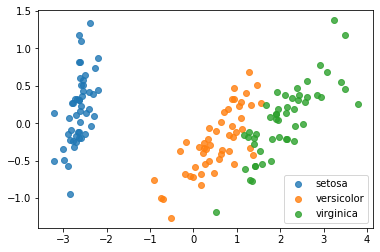

In [80]:
for i, target_names in zip([0,1,2], irysy.target_names):
  plt.scatter(X_new[y==i,0], X_new[y==i,1], alpha=0.8, label=target_names)
plt.legend()

In [77]:
from sklearn.datasets import load_breast_cancer
rak=load_breast_cancer()

In [81]:
X=rak.data
y=rak.target

In [84]:
X.shape

(569, 30)

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
skala=StandardScaler()

In [90]:
X_new=skala.fit_transform(X)

In [91]:
model_PCA=PCA(n_components=2)

In [96]:
X_final=model_PCA.fit_transform(X_new)

In [97]:
X_new.mean()

-6.118909323768877e-16

In [98]:
X_new.var()

1.0

In [102]:
rakDF=pd.DataFrame(data=X_final, columns=['skladowa 1', 'skladowa 2'])

In [101]:
model_PCA.explained_variance_ratio_

array([0.44272026, 0.18971182])

#Zadanie

In [103]:
from sklearn.datasets import load_wine

In [109]:
wino=load_wine()

In [113]:
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(wino.data, wino.target)

In [114]:
skala=StandardScaler()

In [116]:
X_train=skala.fit_transform(X_train)

In [119]:
X_test=skala.transform(X_test)

In [120]:
model_PCA=PCA(n_components=0.9)

In [121]:
X_train=model_PCA.fit_transform(X_train)

In [123]:
X_test=model_PCA.transform(X_test)

In [124]:
model_PCA.n_components_

8